# Aquib Zaman
CSc 46000 HW4 (EDA)


In [4]:
import pandas as pd

data = pd.read_csv('titanic.csv')

print(data.head())
print(data.info())
print(data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [5]:
import numpy as np

# Calculate max, min, mean, and median for numerical columns
numerical_data = data.select_dtypes(include=[np.number])
max_values = numerical_data.max()
min_values = numerical_data.min()
means = numerical_data.mean()
medians = numerical_data.median()

print("Maximum Values:\n", max_values)
print("\nMinimum Values:\n", min_values)
print("\nMeans:\n", means)
print("\nMedians:\n", medians)

# Function to calculate outliers using the IQR method
def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Identify outliers for each numerical column
outlier_dict = {}
for column in numerical_data.columns:
    outliers = calculate_outliers(numerical_data[column])
    outlier_dict[column] = outliers
    print(f"\nOutliers in {column}:")
    print(outliers)


Maximum Values:
 PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

Minimum Values:
 PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

Means:
 PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

Medians:
 PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

Outliers in PassengerId:
Series([], Name: PassengerId, dtype: int64)

Outliers in Survived:
Series([], Name: Survived, dtype: int64)

Outliers in Pclass:
Series([], Name: Pclass, dtype: int64)

Outliers in Age:
33     66.0
54 

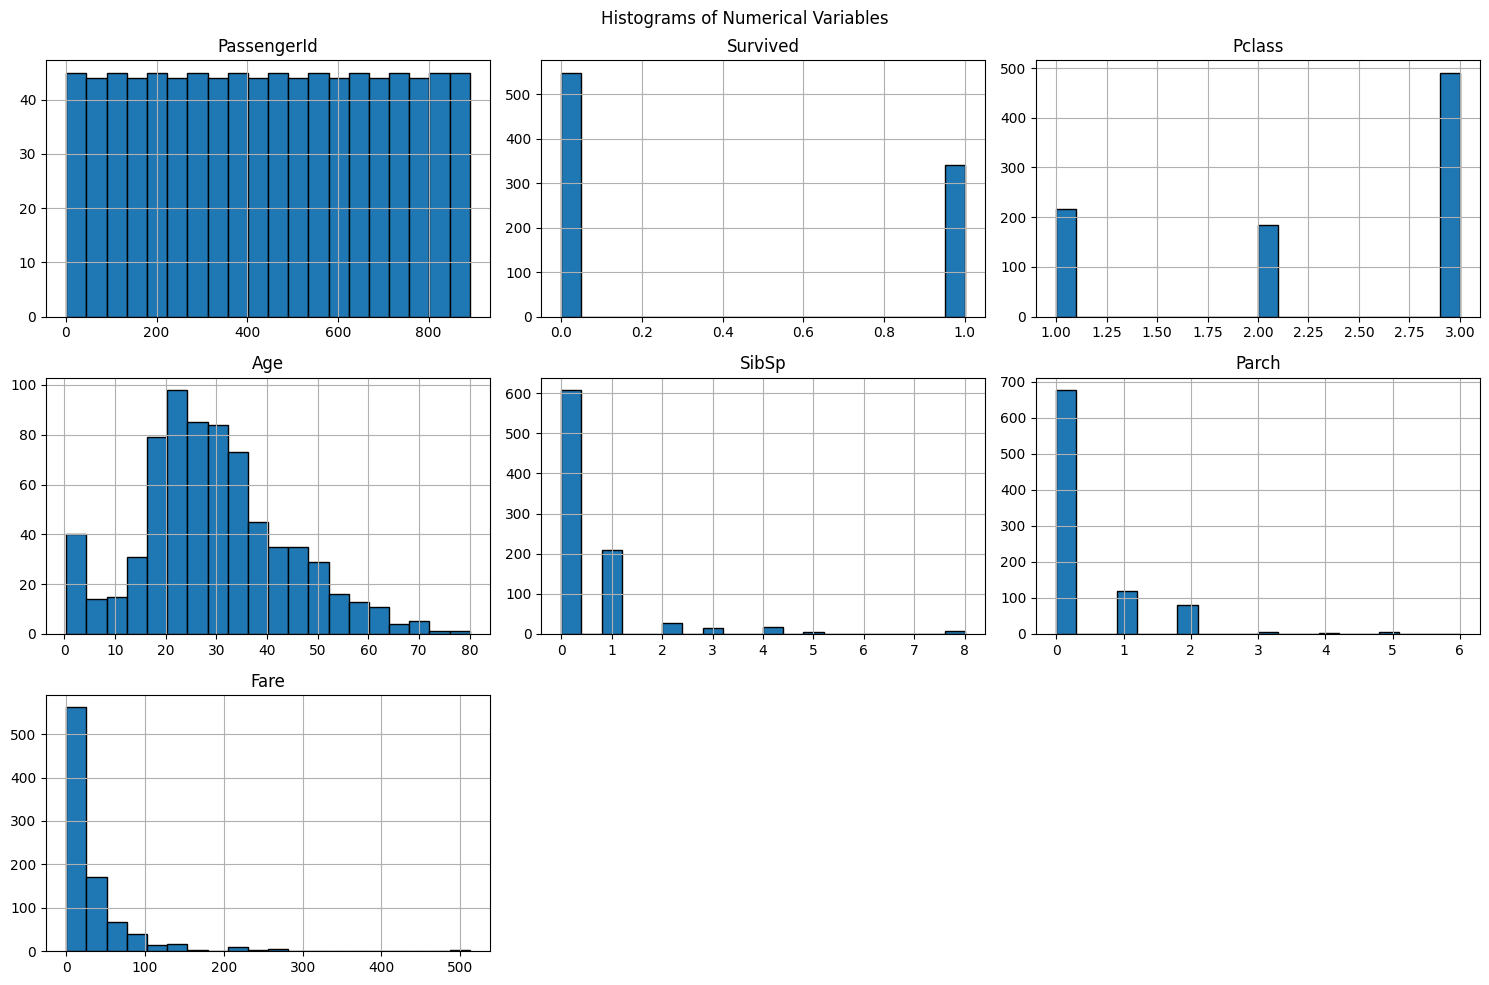

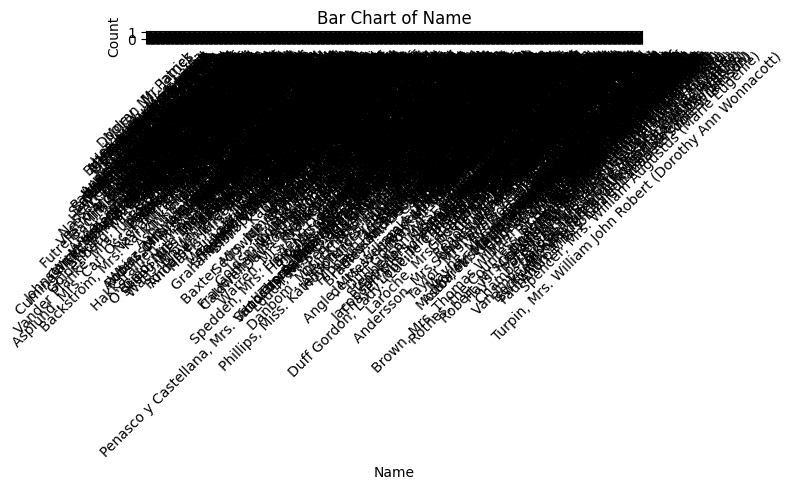

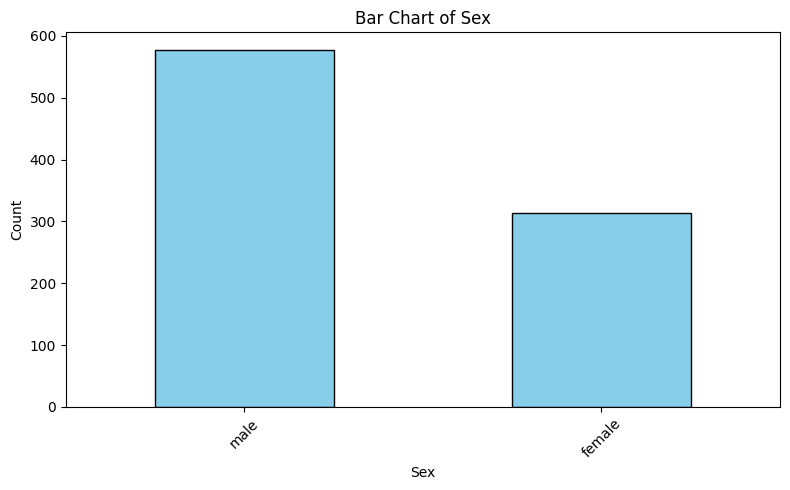

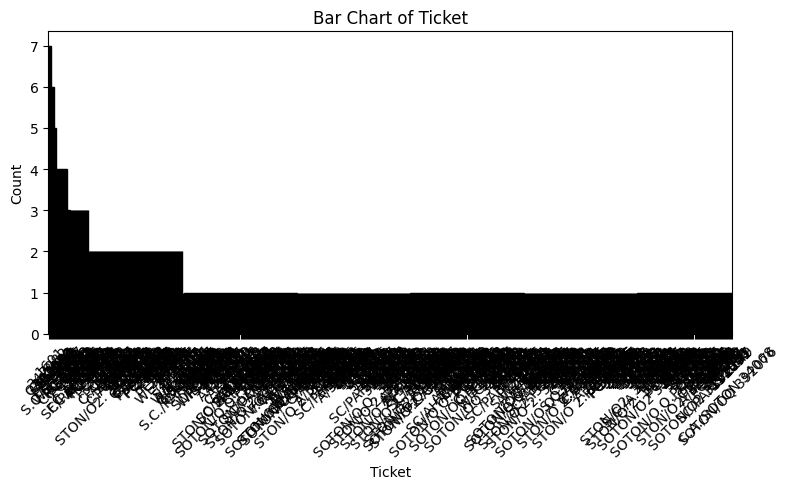

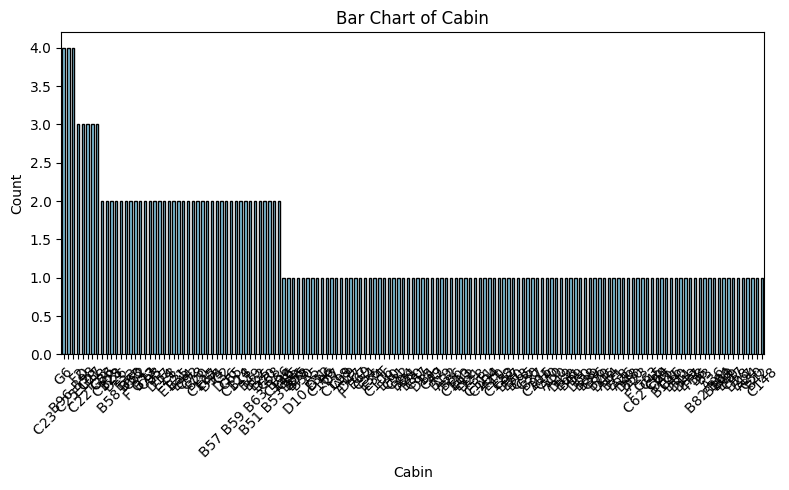

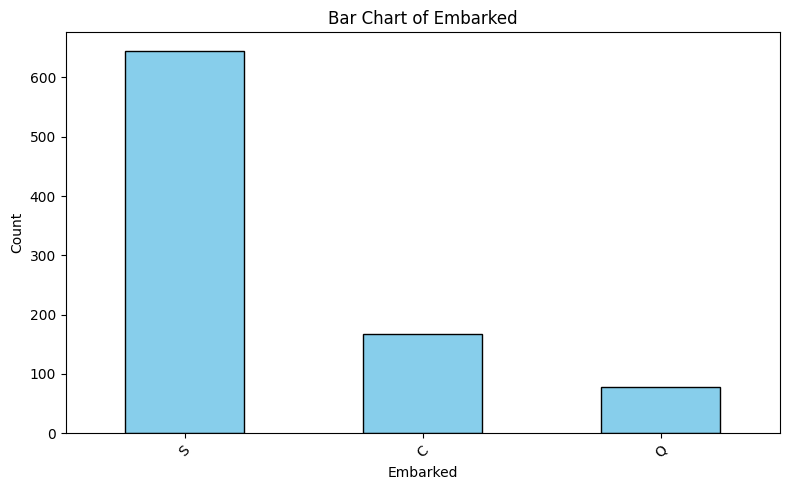

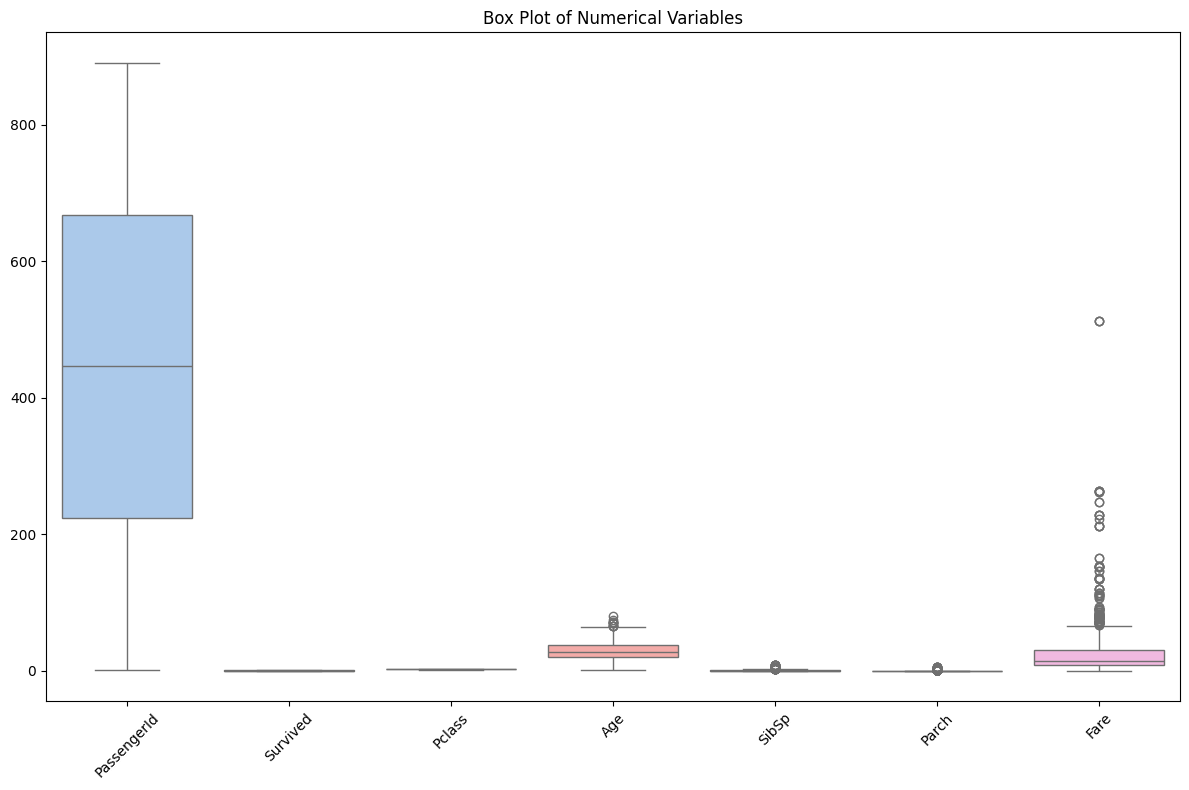

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
numerical_data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.tight_layout()
plt.show()

# Bar charts for categorical columns
categorical_data = data.select_dtypes(include=['object', 'category'])
for column in categorical_data.columns:
    plt.figure(figsize=(8, 5))
    data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Box plot for all numerical variables side by side
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_data, palette="pastel")
plt.title("Box Plot of Numerical Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


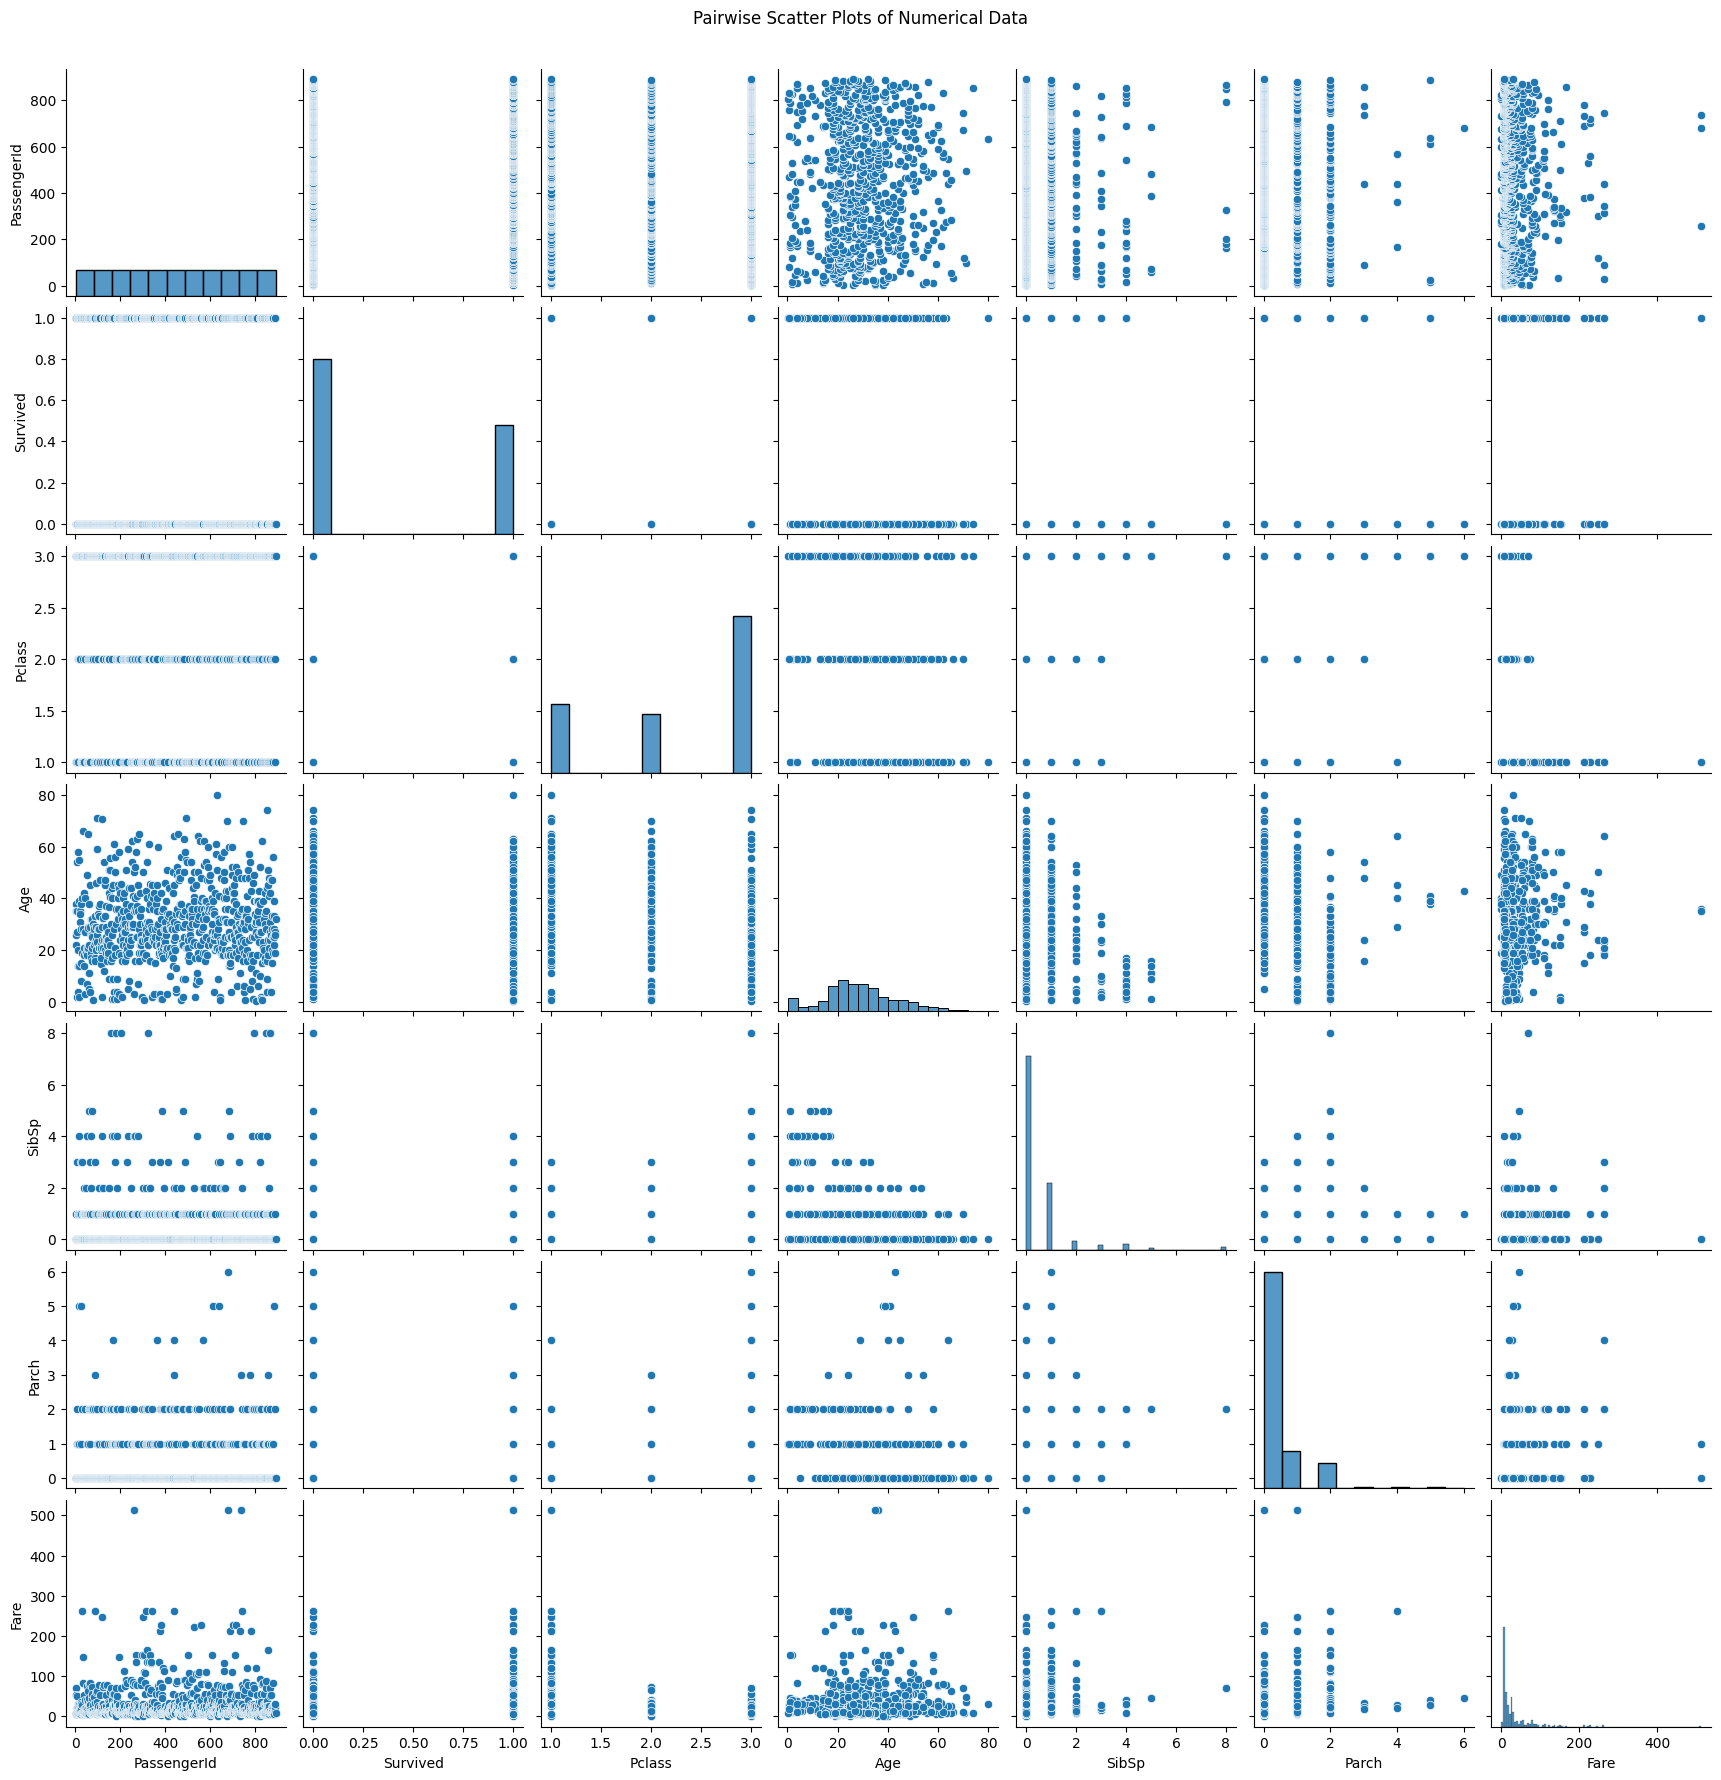

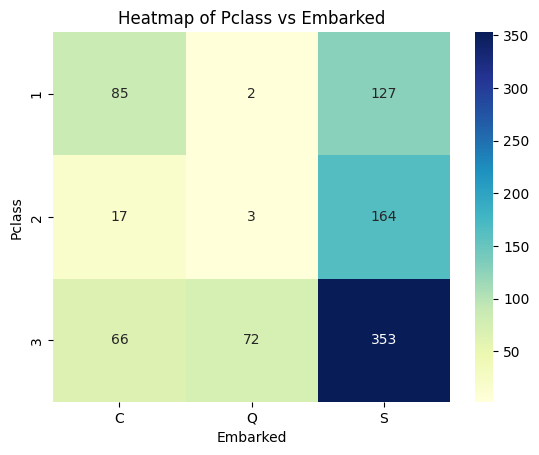

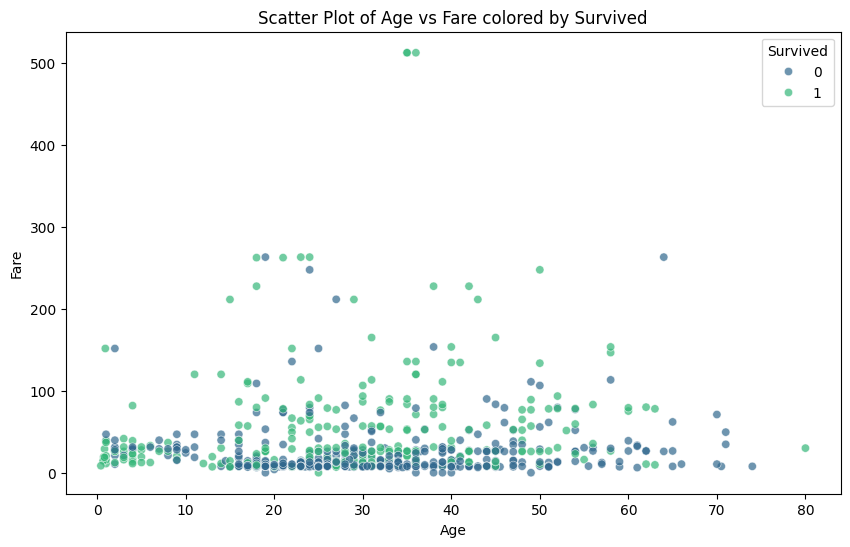

In [7]:
# Pairwise relationships with scatter plot matrix for numerical data
sns.pairplot(numerical_data)
plt.suptitle('Pairwise Scatter Plots of Numerical Data', y=1.02)
plt.show()

# Categorical vs. categorical data: Heatmap for a contingency table
contingency_table = pd.crosstab(data['Pclass'], data['Embarked'])
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Pclass vs Embarked')
plt.xlabel('Embarked')
plt.ylabel('Pclass')
plt.show()

# Numerical vs. Categorical Data: Use scatter plot with color distinction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Age vs Fare colored by Survived')
plt.show()
